In [0]:
# import al the required libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from tqdm import tqdm_notebook
import math
import matplotlib.pyplot as plt

# this function converts the word vectors to 2-D vectors and plot the data on an X-Y plane
def display_pca_scatterplot(model, words=None):
    # if the user has passed no words then the function will work with all te words in the model, but dont try this coz the graph will be messed up 
    if words == None:
        words = [ word for word in model.vocab ]
    word_vectors = np.array([model[w] for w in words]) # load the vectors of the words given, from the model

    twodim = PCA().fit_transform(word_vectors)[:,:2] # dimensionality reduction to 2 on the word vectors
    
    plt.figure(figsize=(12,12)) # define the size of the graph figure
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r') # scatter plot the word vectors
    # print the word next to their point in space
    for word, (x,y) in zip(words, twodim): 
        plt.text(x+0.05, y+0.05, word)

In [2]:
# import required library and load the saved word2vec model
from gensim.models import Word2Vec
model = Word2Vec.load('/content/drive/My Drive/Word2Vec/combined-model/model.model') # load the word2vec model from drive

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


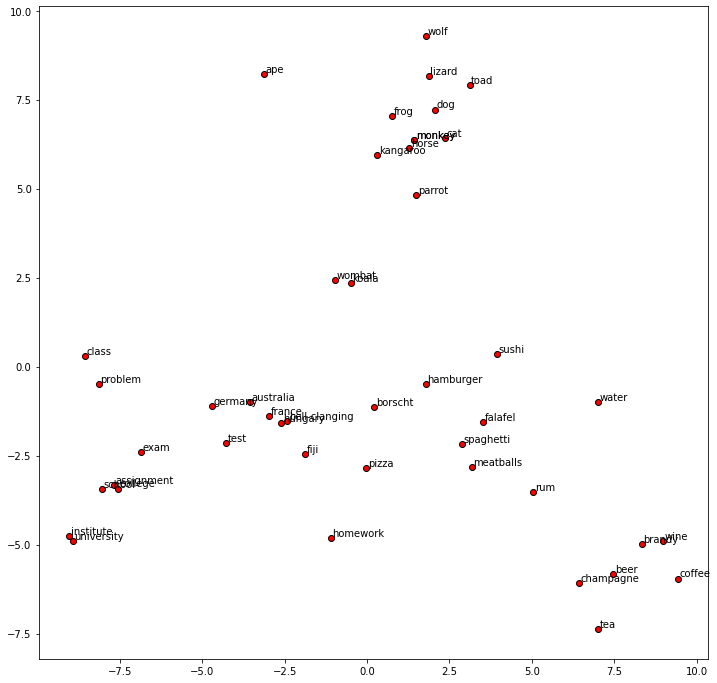

In [3]:
# sample function call which consists words from diverse categories (These words are taken from the web as I didn't want to type them on my own) 
display_pca_scatterplot(model, ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'australia', 'fiji',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute', 'bell-clanging'])


In [0]:
# this function is used to convert the word vector values to 3-D by applying PCA
def three_dim_vec(model):
    # maxi = -math.inf
    # mini = math.inf
    # use all the words from the model if no words are passed to the function
    # if words == None:
    words = [word for word in model.wv.vocab]
    print(len(words)) # print the length of the list words
    word_vectors = np.array([model[w] for w in words]) # get the vector values of all the words given, from the model
    print(len(word_vectors))
    threedim = PCA().fit_transform(word_vectors)[:,:3] # Reduce the vector dimension to 3
    threedim = word_vectors # store the 3-D word_vectors in a variable threedim 
    tok_corp_dict = {'word':None, 'x': [], 'y': [], 'z': []} # initiate an empty dictionary
    tok_corp_dict['word'] = words # put all the words in word tag in dictionary
    print(threedim[0]) 
    # save the word to 3-D vector info as a csv dataset file
    for i in tqdm_notebook(range(len(threedim))):
        # maxi = max(maxi, np.max(threedim))
        # mini = min(mini, np.min(threedim))
        tok_corp_dict['x'].append(threedim[i][0]) # put the first part of vector in x
        tok_corp_dict['y'].append(threedim[i][1]) # put the second part of vector in y
        tok_corp_dict['z'].append(threedim[i][2]) # put the third part of vector in z

    tok_corp_df = pd.DataFrame(tok_corp_dict) # convert the dictionary into a pandas DataFrame
    
    chunk_size = int(tok_corp_df.shape[0] / 10) # to break the DataFrame into 10 parts obtain the approximate size of these chunks 
    ctr = 0
    print(tok_corp_df.head()) # check the tok_corp_df
    print('Word Vector Dumping Started .. ')

    # iterate over the DataFrame at chunk_size intervals and store each chunk in a serial order to the drive
    for start in tqdm_notebook(range(0, tok_corp_df.shape[0], chunk_size)):
        df_subset = tok_corp_df.iloc[start:start + chunk_size] # slice the DataFrame
        df_subset.to_csv('/content/drive/My Drive/Word2Vec/combined-word-vector-maps/combined-word-vector-map-'+str(ctr)+'.csv') # Store dataframe as a csv file
        ctr += 1
    print('Dumping Finished')

In [8]:
three_dim_vec(model)

5656743


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


5656743
[ 0.87069285 -2.4380083   4.5820374  -1.6522021   0.32095927  2.139974
  4.469404    2.6917608   6.821645   -1.3019923   1.6702133  -1.3421332
  0.76823664 -2.5404859  -0.22773378  1.835924    3.205248   -5.3980875
 -2.5476136   1.6537232   0.48651546  0.51861316  3.3545308   3.1903837
  4.678168   -2.2711046   3.6745257   2.2030077  -0.25673506 -8.810806
 -1.1194524  -2.124434  ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



        word         x         y         z
0          I  0.870693 -2.438008  4.582037
1  purchased -3.233436 -2.716032 -3.202593
2       this  0.945580 -2.704733 -1.545107
3       item -2.688989  0.083493  2.468808
4      about -0.155559 -0.743430  1.448126
Word Vector Dumping Started .. 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Dumping Finished


In [0]:
model.doesnt_match(['dog', 'cat', 'wolf', 'tree']) # find the odd one out

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'tree'

In [0]:
model.most_similar('queen') # words most similar to queen

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('princess', 0.9213057160377502),
 ('bride', 0.9021848440170288),
 ('bridegroom', 0.9007720947265625),
 ('damsel', 0.8912885189056396),
 ('prince', 0.883784294128418),
 ('saint', 0.8679945468902588),
 ('king', 0.8674891591072083),
 ('Tsar', 0.8602218627929688),
 ('mistress', 0.8580375909805298),
 ('Princess', 0.8551671504974365)]

In [0]:
model.most_similar('good') # words most similar to bad

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('bad', 0.8380252122879028),
 ('decent', 0.8280789852142334),
 ('profitable', 0.8030284643173218),
 ('unfit', 0.7714719176292419),
 ('useful', 0.7598644495010376),
 ('best', 0.7529378533363342),
 ('needful', 0.7514627575874329),
 ('trifling', 0.7362024188041687),
 ('foolish', 0.7359263896942139),
 ('nice', 0.7330319881439209)]

In [0]:
# analogy function is like if man is to woman then king is to??
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [0]:
analogy('woman', 'girl', 'man') # apply analogy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'youngster'

In [0]:
analogy('king', 'man', 'queen')# apply analogy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'woman'

In [0]:
analogy('man', 'woman', 'dog')# apply analogy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'cat'

In [0]:
# terminate the notebook
import os
os.kill(os.getpid(), 9)